In [31]:
import data_manager

# Part 1. Data cleaning and Exploratory Data Analysis (EDA)

This part will practice data cleaning and Exploratory Data Analysis (EDA) using a house price dataset and mpg dataset.<br>
The first dataset is from a [Kaggle competition ](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview), where the task is to predict a house sale price given house features.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

## 1. Import data and visually inspect the table
### 1a) Data import and basic inspection.
We can import the csv data using `pd.read_csv()` function. We can use `df.head()` and `df.tail()` to show the first and last 5 entries. `df.iloc[[3,5,7]]` shows the entries corresponding to the index 3,5,7. 
What is the maximum value of the feature `MSSubClass` among the last 10 entries? Update the value of `maxval` to the correct integer value.

In [33]:
df = pd.read_csv('data/house_data.csv') #it is the same data as the kaggle competition's train.csv.
# your code here
df.tail(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1450,1451,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [34]:
# uncomment maxval and update the correct integer value
maxval = 180

### 1b) df.info() gives the overview of the data frame. Inspect the data using df.info() and answer below questions.
#### 1b-i) Which column is the target? 
#### 1b-ii) How many features are in the data? Exclude the target. (Id is not a useful feature, but let's still include)
#### 1b-iii) How many observations (samples) are in the data? 
#### 1b-iv) How many features have null values based on the data overview?

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [36]:
df[["MSSubClass"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   MSSubClass  1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


## 2. Inspect Null values [16 pts]
The empty values in the data are called null values. Null values can take different forms.
Have a look at below example. `np.nan` and `None` are native null values in python. They get displayed differently in the pandas dataframe (`pd.DataFrame`) though. But there are other data types such as empty list, empty dictionary, etc and string values that literally says "null" or that are empty spaces.
Depending on how messy the data is, sometimes the table may have null values of one or more kinds, and those can be cleaned manually or automatically if you can write a code to include all possible cases which meanings are null values. 

In [37]:
a = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ', '   ']
nulldemo = pd.DataFrame(a)
nulldemo

,0
0,NaN
1,None
2,[]
3,{}
4,NaN
5,Null
6,NULL
7,None
8,NA
9,?


.isnull() method applied to pandas dataframe or series can detect null values. .dropna() method in pandas will detect null values and can be specified to drop either rows or columns that contain null values. Below shows that .isnull() only detects the python-native null values and cannot detect other forms (string value) of variables that meant null.

In [38]:
nulldemo.isnull()

,0
0,True
1,True
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


Also, sometimes the python-native null values can have an odd data type such as numpy float. 

In [39]:
print("Existing index 40: {}, no existing: {}".format(df['MasVnrArea'].iloc[40], df['MasVnrArea'].iloc[234]))

Existing index 40: 101.0, no existing: nan


In [40]:
print(df['MasVnrArea'].iloc[234], df['MasVnrArea'].iloc[234].dtype, type(df['MasVnrArea'].iloc[234]))
print(df['MasVnrArea'].isnull().iloc[234])
print(np.isnan(df['MasVnrArea'].iloc[234])) 
print(math.isnan(df['MasVnrArea'].iloc[234]))
print(df['MasVnrArea'].iloc[234]==np.nan)
print(df['MasVnrArea'].iloc[234]==np.float64(np.nan))

nan float64 <class 'numpy.float64'>
True
True
True
False
False


np.isnan() and math.isnan() can detect the nan values with numpy float type, but they will cause errors with native None or a string value. Uncomment one of below (one at a time) and run. You'll see error messages.

In [42]:
# print(np.isnan(None))
# print(np.isnan('None'))
# print(math.isnan(None))
# print(math.isnan('None'))

### 2a) Check null values type
Let's check if our data has clean null values (one kind) or messy null values (multiple different representations). Run the codes below and visually inspect the printed results. Which column has string-typed null/none values and how many elements are string-typed null/none values?

In [ ]:
# prints number of null values detected by .isnull() and string none
print(a)
print(a[2:])
for c in df.columns:
    string_null = np.array([x in a[2:] for x in df[c]])
    print(c, df[c].isnull().sum(), string_null.sum()) 

[nan, None, [], {}, 'NaN', 'Null', 'NULL', 'None', 'NA', '?', '-', '.', '', ' ', '   ']
[[], {}, 'NaN', 'Null', 'NULL', 'None', 'NA', '?', '-', '.', '', ' ', '   ']
Id 0 0
MSSubClass 0 0
MSZoning 0 0
LotFrontage 259 0
LotArea 0 0
Street 0 0
Alley 1369 0
LotShape 0 0
LandContour 0 0
Utilities 0 0
LotConfig 0 0
LandSlope 0 0
Neighborhood 0 0
Condition1 0 0
Condition2 0 0
BldgType 0 0
HouseStyle 0 0
OverallQual 0 0
OverallCond 0 0
YearBuilt 0 0
YearRemodAdd 0 0
RoofStyle 0 0
RoofMatl 0 0
Exterior1st 0 0
Exterior2nd 0 0
MasVnrType 8 864
MasVnrArea 8 0
ExterQual 0 0
ExterCond 0 0
Foundation 0 0
BsmtQual 37 0
BsmtCond 37 0
BsmtExposure 38 0
BsmtFinType1 37 0
BsmtFinSF1 0 0
BsmtFinType2 38 0
BsmtFinSF2 0 0
BsmtUnfSF 0 0
TotalBsmtSF 0 0
Heating 0 0
HeatingQC 0 0
CentralAir 0 0
Electrical 1 0
1stFlrSF 0 0
2ndFlrSF 0 0
LowQualFinSF 0 0
GrLivArea 0 0
BsmtFullBath 0 0
BsmtHalfBath 0 0
FullBath 0 0
HalfBath 0 0
BedroomAbvGr 0 0
KitchenAbvGr 0 0
KitchenQual 0 0
TotRmsAbvGrd 0 0
Functional 0 0
Firepl

Which column has string-typed null/none values? 
How many elements are string-typed null/none values?

In [65]:
for c in df.columns:
    string_null = np.array([x in a[2:] for x in df[c]])
    if string_null.sum()>0:
        print("Column: \'{}\' elements string-typed null: {}".format(c, string_null.sum())) 

Column: 'MasVnrType' elements string-typed null: 864


### 2b) Inspect observations (rows) with null values. How many observations have at least one missing value?

In [76]:
rows_with_null = 0
for r in df.values:
    # print(r)
    string_null = np.array([x in a[:2] for x in r])
    if string_null.sum()>0:
        rows_with_null += 1
print("Total rows:{} Rows with null values:{}".format(len(df),rows_with_null))

Total rows:1460 Rows with null values:1460


In [80]:
rows_with_notnull = df[df.notnull().all(axis=1)]
len(rows_with_notnull)

0

### 2c) Make a histogram of null counts [6 pts]
+ The ***histogram x-axis*** is the null value count range. Please use bins with width = 50 (e.g. bins are [0,50,100, ...,1550])
+ The ***histogram y-axis*** is the count of features with the number of null values within the histogram bin range. For example, if 10 feature columns have numbers of null values between 0 and 50, then the first box's y-value is 10 in the plot. <br>

**Hint**: matplotlib library has a function .hist that can plot histograms

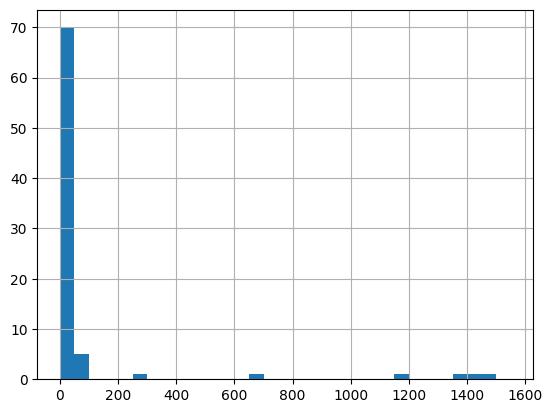

In [106]:
# your code here
x = range(0,1600,50)
y = df.isnull().sum(axis=0)

# Please uncomment and update
# do not change the names of the variables from null_counts and histogram

null_counts=pd.Series(y)
histogram = null_counts.hist(bins=x) # replace the histogram to be the plt.hist() object. 

# Hint: Use .isnull() and sum over True values on columns.